In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Models Estimation

In [79]:
path = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/eco_181226_all_data/'
print(len(sorted(os.listdir(path))))
rnd_idx = np.array( [2,9,20,29,45,52,59,75,80,84,97,103,116,122,126,133,152,168,195,199, 118, 132, 144,193, 200,98] )
len(rnd_idx)

800


26

In [80]:
y = np.array(pd.read_csv(path+f'{rnd_idx[0]}_percep_force_ecoflex_181226_data.csv'))
x = np.array(pd.read_csv(path+f'{rnd_idx[0]}_percep_pos_ecoflex_181226_data.csv'))
l = len(y)
x.shape, y.shape

((1272, 12), (1272, 1))

In [81]:
for i in range(len(rnd_idx)-1):
    x1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]}_percep_pos_ecoflex_181226_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]}_percep_force_ecoflex_181226_data.csv'))

    x = np.concatenate([x,x1])
    y = np.concatenate([y,y1])
print(x.shape, y.shape)

(32612, 12) (32612, 1)


In [82]:
y_test = np.array(pd.read_csv(path+f'{rnd_idx[3]-2}_force_ecoflex_181226_data.csv'))
x_test = np.array(pd.read_csv(path+f'{rnd_idx[3]-2}_pos_ecoflex_181226_data.csv'))

x_test.shape, y_test.shape

((34462, 12), (34462, 1))

In [83]:
for i in range(len(rnd_idx)//2):
    x1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]-1}_pos_ecoflex_181226_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]-1}_force_ecoflex_181226_data.csv'))
    x_test = np.concatenate([x_test,x1])
    y_test = np.concatenate([y_test,y1])
print(x_test.shape, y_test.shape)

(482457, 12) (482457, 1)


In [ ]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x,y)
t2 = datetime.now()
y_pred = cat.predict(x_test)

In [85]:
print('RMSE:', mean_squared_error(y_pred, y_test)**0.5)
print(t2-t1)

RMSE: 0.3147285248410691
0:00:05.401748


In [86]:
for i in range(81,90):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = cat.predict(x1)
    print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')

For point: 81, Error: 0.1449484286492267
For point: 82, Error: 0.1949772984355772
For point: 83, Error: 0.17982729370791417
For point: 84, Error: 0.16191860717560255
For point: 85, Error: 0.2510131634150776
For point: 86, Error: 0.1622998900991824
For point: 87, Error: 0.2019984406455025
For point: 88, Error: 0.20622286070442294
For point: 89, Error: 0.2772914510647248


In [87]:
error = []
for i in range(1,201):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = cat.predict(x1)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('results_catboost.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))

0.22722772911713224


In [88]:
max(error), min(error)

(0.47345785962113446, 0.11980689377698489)

In [89]:
np.std(np.array(error))

0.0805362014478741

In [90]:
for i in range(5):
    val = sorted(error)[::-1][i]
    print(val, 'at', error.index(val)+1)


0.47345785962113446 at 115
0.47294390876749687 at 1
0.45377693446910666 at 193
0.41748316136488306 at 101
0.40167281306794306 at 14


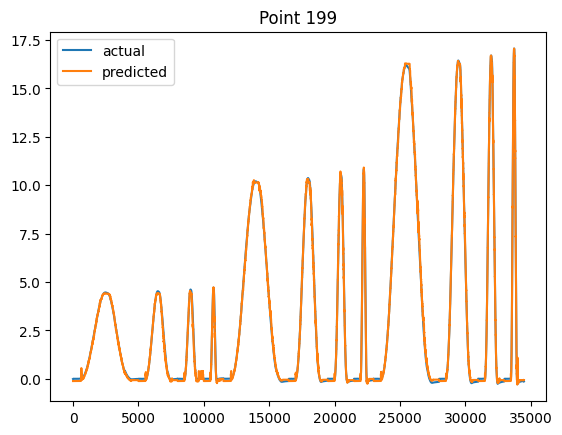

In [91]:
def graph(i):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = cat.predict(x1)
    plt.plot(range(len(y1)), y1, label = 'actual')
    plt.plot(range(len(y1)), y_pred, label = 'predicted')
    plt.legend()
    plt.title(f'Point {i}')
    plt.show()

graph(199)

# Random Forest

In [92]:
rf = RandomForestRegressor()
t1 = datetime.now()
rf.fit(x,y)
t2 = datetime.now()
y_pred = rf.predict(x_test)
print('RMSE:', mean_squared_error(y_pred, y_test)**0.5)
print(t2-t1)

RMSE: 0.35569539556750196
0:00:28.373362


In [93]:
for i in range(74,82):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = rf.predict(x1)
    print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')

For point: 74, Error: 0.4080311876928697
For point: 75, Error: 0.18624028608873042
For point: 76, Error: 0.33935211533624376
For point: 77, Error: 0.20501115726669966
For point: 78, Error: 0.22915720706296253
For point: 79, Error: 0.28699914771939905
For point: 80, Error: 0.13378443183126035
For point: 81, Error: 0.1538105717664018


In [ ]:
error = []
for i in range(1,201):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = rf.predict(x1)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('results.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))

In [102]:
print(sum(error)/len(error))
print(np.std(np.array(error)))
max(error), min(error)

0.24457713096682226
0.10082171824629181


(0.6955473261427206, 0.10669321101788498)

# Clusterring

In [103]:
path2 = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/'
arr = np.array(pd.read_csv(path2+'x_y_181226.csv', names = ['x','y']))
print(arr.shape)
arr[:5]

(200, 2)


array([[-0.0001, -0.0149],
       [-0.0002,  0.0185],
       [-0.0006,  0.0077],
       [-0.001 ,  0.0042],
       [-0.0012,  0.006 ]])

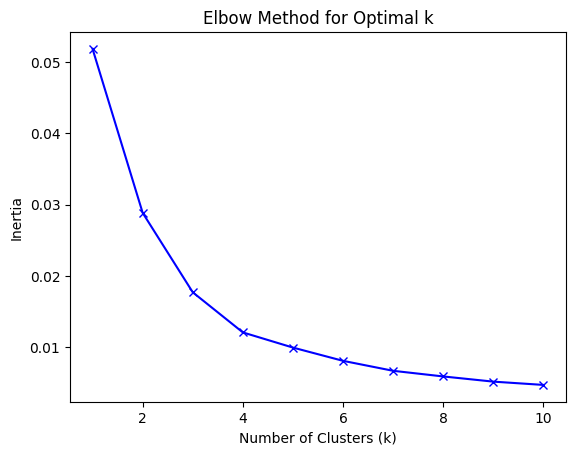

In [104]:
from sklearn.cluster import KMeans
k_values = range(1, 11)

# Perform k-means clustering for each k value
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(arr)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [105]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(arr)
kmeans.cluster_centers_

array([[-0.01177826,  0.01035   ],
       [ 0.01122222, -0.01095111],
       [ 0.00069394,  0.00274848],
       [ 0.01311951,  0.01108293],
       [-0.01222857, -0.00803143]])

In [106]:
from collections import defaultdict
d = defaultdict(lambda: [])
for i in range(200):
    label = kmeans.predict([arr[i]])[0]
    d[label].append(i)

for i in range(5):
    print(d[i])

[1, 7, 8, 9, 12, 18, 21, 25, 27, 29, 30, 32, 34, 35, 37, 38, 39, 41, 42, 44, 45, 46, 50, 56, 61, 62, 64, 65, 67, 69, 70, 72, 74, 75, 76, 79, 81, 82, 86, 87, 88, 91, 92, 93, 94, 95]
[0, 97, 101, 102, 109, 111, 112, 115, 121, 122, 127, 130, 133, 134, 136, 137, 140, 144, 146, 149, 150, 153, 155, 156, 157, 158, 159, 161, 163, 164, 165, 166, 167, 170, 173, 174, 179, 180, 183, 185, 188, 191, 194, 196, 198]
[2, 3, 4, 5, 6, 10, 14, 15, 16, 19, 20, 22, 23, 24, 96, 98, 99, 100, 103, 104, 105, 106, 107, 108, 110, 113, 116, 117, 118, 119, 123, 131, 143]
[114, 120, 124, 125, 126, 128, 129, 132, 135, 138, 139, 141, 142, 145, 147, 148, 151, 152, 154, 160, 162, 168, 169, 171, 172, 175, 176, 177, 178, 181, 182, 184, 186, 187, 189, 190, 192, 193, 195, 197, 199]
[11, 13, 17, 26, 28, 31, 33, 36, 40, 43, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 63, 66, 68, 71, 73, 77, 78, 80, 83, 84, 85, 89, 90]


In [107]:
from scipy.linalg import norm

def dist(i):
    at = -1
    mini = 10
    for j in range(len(d[i])):
        dis = ((arr[d[i][j]][0]- kmeans.cluster_centers_[i][0])**2 + (arr[d[i][j]][1]- kmeans.cluster_centers_[i][1])**2)**0.5
        if dis <mini:
            mini = dis
            at = j
    print(f'{d[i][at]+1} is the master node of {i}th cluster')
    print(arr[d[i][at]], kmeans.cluster_centers_[i],'\n')
for i in range(5):
    dist(i)

62 is the master node of 0th cluster
[-0.0136  0.0116] [-0.01177826  0.01035   ] 

145 is the master node of 1th cluster
[ 0.0107 -0.0114] [ 0.01122222 -0.01095111] 

107 is the master node of 2th cluster
[0.0024 0.0024] [0.00069394 0.00274848] 

152 is the master node of 3th cluster
[0.0119 0.0108] [0.01311951 0.01108293] 

54 is the master node of 4th cluster
[-0.0115 -0.007 ] [-0.01222857 -0.00803143] 



In [108]:
x1 = np.array(pd.read_csv(path+f'{49}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{49}_force_ecoflex_181226_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[0])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total = error

0.26921274876171764
0.3874367601451188 0.16393371589708497


In [109]:
x1 = np.array(pd.read_csv(path+f'{145}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{145}_force_ecoflex_181226_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[1])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.17565593678242203
0.6154008866831231 0.022202646460606483


In [110]:
x1 = np.array(pd.read_csv(path+f'{152}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{152}_force_ecoflex_181226_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[2])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.3707302775194629
0.640949922137338 0.2537415469674027


In [111]:
x1 = np.array(pd.read_csv(path+f'{75}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{75}_force_ecoflex_181226_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[3])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total+= error

0.2799132133829857
0.678851653310649 0.12491610784745295


In [112]:
x1 = np.array(pd.read_csv(path+f'{6}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{6}_force_ecoflex_181226_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[4])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181226_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181226_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.32240491072601973
0.5714705644654806 0.21299020866083143


In [113]:
print('Mean:', np.mean(np.array(total)))
print('Std:', np.std(np.array(total)))

Mean: 0.27641508190251696
Std: 0.11010387384504783


In [114]:
max(total)

0.678851653310649